# Monte Carlo Method — A Practical Introduction

Monte Carlo (MC) methods estimate numbers by random sampling.
If you can sample points uniformly in a region and evaluate a function there, you can estimate integrals, areas, and volumes.

## 1. Area of a circle (radius 2)
Sample points in the square $[-2,2]^2$ and count the fraction inside the circle.
Area estimate is square area $\times$ inside fraction. True area is $\pi r^2 = 4\pi$.

## 2. Volume of a unit sphere and estimating $\pi$
Sample in cube $[-1,1]^3$. Fraction inside sphere times cube volume (8) gives sphere volume $\frac{4}{3}\pi$.
Thus $\pi = 6 \times$ fraction.

## 3. Core idea (in one line)
If $U$ is uniformly random in a region $D$ with volume $|D|$, then\n
$$\int_D f(x)\,dx = |D|\;\mathbb{E}[f(U)]\approx |D|\;\frac{1}{N}\sum_{i=1}^N f(u_i).$$
- The estimate gets better like $\propto 1/\sqrt{N}$.
- Set a random seed to get repeatable results.

In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

# Reproducible RNG
rng = np.random.default_rng(42)

## 4. Random numbers and distributions (quick look)
We'll draw Uniform(0,1) and Normal(0,1) samples and plot histograms.

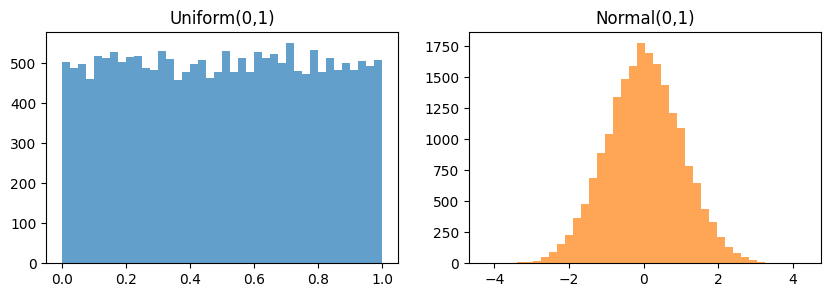

In [2]:
n = 20_000
u = rng.random(n)                 # Uniform(0,1)
g = rng.standard_normal(n)        # Normal(0,1)

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].hist(u, bins=40, color='tab:blue', alpha=0.7); ax[0].set_title('Uniform(0,1)')
ax[1].hist(g, bins=40, color='tab:orange', alpha=0.7); ax[1].set_title('Normal(0,1)')
plt.show()

## 5. Triple integral over a cube
Estimate
$$I = \iiint_{[-1,1]^3} x^2(y-1)^2(z-2)^2 e^{xyz}\,dx\,dy\,dz.$$
We sample uniformly in the cube and average.

## 6. Integral over a sphere (unit ball)
We want the same integrand but over $\{(x,y,z): x^2+y^2+z^2 \le 1\}$.
To sample uniformly in a ball: pick a random direction on the sphere and a radius $r=U^{1/3}$.

## 7. Area under a curve: $y=x^2$ on $[0,3]$
Two quick ways: (1) integrate in 1D; (2) hit-or-miss in a bounding box. True area is $\int_0^3 x^2 dx = 9$.

## 8. Convergence: error vs number of samples
We'll estimate $\pi$ multiple times for different $N$ and plot empirical standard deviation of the estimates. Expect slope $-1/2$ on a log-log plot.

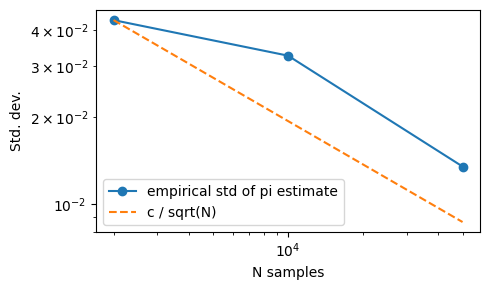

In [ ]:
Ns = np.array([2_000, 10_000, 50_000])
trials = 20
stds = []
for N in Ns:
    ests = []
    for t in range(trials):
        P = rng.uniform(-1, 1, size=(N,3))
        frac = float(np.mean(np.sum(P**2, axis=1) <= 1.0))
        ests.append(6.0*frac)
    stds.append(np.std(ests, ddof=1))

plt.figure(figsize=(5,3))
plt.loglog(Ns, stds, 'o-', label='empirical std of $pi estimate')
# Reference ~ c / sqrt(N): fit c using first point
c = stds[0] * math.sqrt(Ns[0])
plt.loglog(Ns, c/np.sqrt(Ns), '--', label='c / sqrt(N)')
plt.xlabel('N samples')
plt.ylabel('Std. dev.')
plt.legend(); plt.tight_layout(); plt.show()

## 9. A reusable MC integrator (hypercube)
We'll integrate over a box: bounds = [(a1,b1),...,(ad,bd)].
Returns estimate and a simple standard-error estimate.

## 10. Takeaways
- MC estimates averages with error that shrinks like $1/\sqrt{N}$.
- Integrals over regions: sample uniformly in the region (box, ball, etc.).
- Use a seed for repeatability.
- For faster convergence, consider variance reduction (stratified sampling, control variates) — not covered here but very helpful in practice.